In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

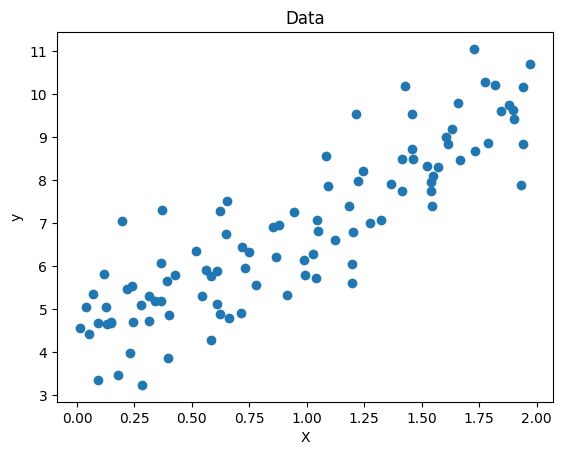

In [ ]:
plt.scatter(X, y, label = 'Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data')
plt.show()

In [ ]:
def compute_mse(X, y, w, b):
  N = len(X)
  mse = 0
  for i in range(N):
    yhat = w * X[i] + b
    mse += (yhat - y[i]) ** 2
  return mse / N

def compute_grad(X, y, w, b):
  N = len(X)
  dw_sum = 0
  db_sum = 0
  for i in range(N):
    dw = 2 * (w * X[i] + b - y[i]) * X[i]
    db = 2 * (w * X[i] + b - y[i])
    dw_sum += dw
    db_sum += db

  return dw_sum / N, db_sum / N

def train(X, y, w, b, lr, epochs):
  for epoch in range(epochs):
    dw, db = compute_grad(X, y, w, b)
    w = w - lr * dw
    b = b - lr * db
    if epoch % 100 == 0:
      mse = compute_mse(X, y, w, b)
      print(f'Epoch {epoch}, MSE: {mse}')
  return w, b

In [ ]:
w, b = 0, 0
lr = 0.1
epochs = 1000
w, b = train(X, y, w, b, lr, epochs)
print(w, b)

Epoch 0, MSE: [17.93538892]
Epoch 100, MSE: [0.80686355]
Epoch 200, MSE: [0.80658484]
Epoch 300, MSE: [0.80658456]
Epoch 400, MSE: [0.80658456]
Epoch 500, MSE: [0.80658456]
Epoch 600, MSE: [0.80658456]
Epoch 700, MSE: [0.80658456]
Epoch 800, MSE: [0.80658456]
Epoch 900, MSE: [0.80658456]
[2.77011339] [4.21509616]


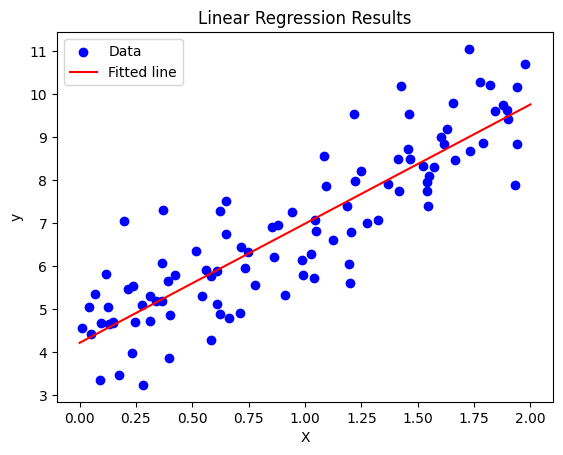

In [ ]:
plt.scatter(X, y, color='blue', label='Data')
X_line = np.array([0, 2])
y_line = w * X_line + b
plt.plot(X_line, y_line, color='red', label='Fitted line')
plt.xlabel("X")
plt.ylabel('y')
plt.title('Linear Regression Results')
plt.legend()
plt.show()

In [ ]:
def predict(w, b, x):
  return w * x + b

x_new = 23.0
y_new = predict(w, b, x_new)
print(y_new)

[67.92770405]


In [ ]:
def scikit_train(X, y):
  from sklearn.linear_model import LinearRegression
  X = X.reshape(-1, 1)
  y = y.ravel()
  model = LinearRegression().fit(X, y)
  return model
model = scikit_train(X, y)
x_new = np.array([x_new]).reshape(-1, 1) # Convert x_new to a NumPy array before reshaping
print(model.predict(x_new))


[67.92770405]


In [ ]:
def compute_mse_rr(X, y, w, b, lam):
  N = len(X)
  mse = 0
  for i in range(N):
    yhat = w * X[i] + b
    mse += (yhat - y[i]) ** 2
  return mse / N + lam * (w ** 2)

def compute_grad_rr(X, y, w, b, lam):
  N = len(X)
  dw_sum = 0
  db_sum = 0
  for i in range(N):
    dw = 2 * (w * X[i] + b - y[i]) * X[i] + 2 * lam * w
    db = 2 * (w * X[i] + b - y[i])
    dw_sum += dw
    db_sum += db

  return dw_sum / N, db_sum / N

def train_rr(X, y, w, b, lr, epochs, lam):
  for epoch in range(epochs):
    dw, db = compute_grad_rr(X, y, w, b, lam)
    w = w - lr * dw
    b = b - lr * db
    if epoch % 100 == 0:
      mse = compute_mse_rr(X, y, w, b, lam)
      print(f'Epoch {epoch}, MSE: {mse}')
  return w, b

In [ ]:
w, b = 0, 0
lr = 0.01
epochs = 1000
lam = 0.1
w, b = train_rr(X, y, w, b, lr, epochs, lam)
print(w, b)

Epoch 0, MSE: [46.05241875]
Epoch 100, MSE: [1.88251999]
Epoch 200, MSE: [1.60496872]
Epoch 300, MSE: [1.48959846]
Epoch 400, MSE: [1.44032382]
Epoch 500, MSE: [1.41927838]
Epoch 600, MSE: [1.41028978]
Epoch 700, MSE: [1.4064507]
Epoch 800, MSE: [1.40481101]
Epoch 900, MSE: [1.40411069]
[2.17606549] [4.76842]


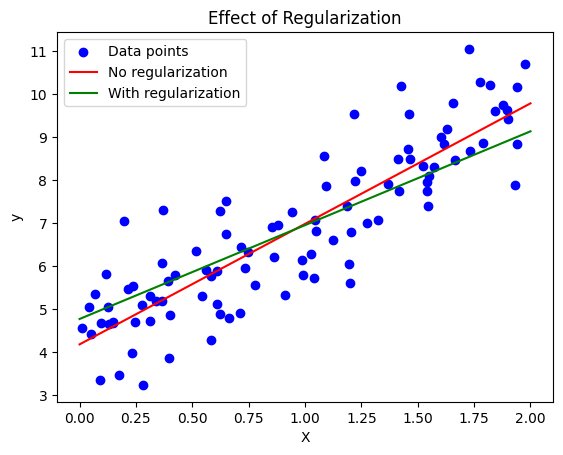

In [ ]:
plt.scatter(X, y, color='blue', label='Data points')

# Plot unregularized line
X_line = np.array([0, 2])
y_line_noreg = 2.80 * X_line + 4.18
plt.plot(X_line, y_line_noreg, color='red', label='No regularization')

# Plot regularized line
y_line_reg = 2.18 * X_line + 4.77
plt.plot(X_line, y_line_reg, color='green', label='With regularization')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Effect of Regularization')
plt.legend()
plt.show()

In [ ]:
for lam in [0.01, 0.1, 1.0]:
    w, b = train_rr(X, y, 0, 0, lr, epochs, lam)
    print(f"Lambda {lam}: w={w}, b={b}")

Epoch 0, MSE: [46.05045586]
Epoch 100, MSE: [1.0701258]
Epoch 200, MSE: [0.97051852]
Epoch 300, MSE: [0.92565828]
Epoch 400, MSE: [0.90332734]
Epoch 500, MSE: [0.89221074]
Epoch 600, MSE: [0.88667677]
Epoch 700, MSE: [0.88392189]
Epoch 800, MSE: [0.88255049]
Epoch 900, MSE: [0.88186778]
Lambda 0.01: w=[2.72239604], b=[4.25419372]
Epoch 0, MSE: [46.05241875]
Epoch 100, MSE: [1.88251999]
Epoch 200, MSE: [1.60496872]
Epoch 300, MSE: [1.48959846]
Epoch 400, MSE: [1.44032382]
Epoch 500, MSE: [1.41927838]
Epoch 600, MSE: [1.41028978]
Epoch 700, MSE: [1.4064507]
Epoch 800, MSE: [1.40481101]
Epoch 900, MSE: [1.40411069]
Lambda 0.1: w=[2.17606549], b=[4.76842]
Epoch 0, MSE: [46.07204763]
Epoch 100, MSE: [4.50936287]
Epoch 200, MSE: [3.03428711]
Epoch 300, MSE: [2.83059664]
Epoch 400, MSE: [2.80246197]
Epoch 500, MSE: [2.79857589]
Epoch 600, MSE: [2.79803912]
Epoch 700, MSE: [2.79796498]
Epoch 800, MSE: [2.79795474]
Epoch 900, MSE: [2.79795333]
Lambda 1.0: w=[0.71899714], b=[6.14377652]
